In [52]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Results for baseline and mamba models
- Need to add results for Mamba to compare with baseline model.
- Probably a good idea to add different Mamba models to show progress.

In [62]:
import os
import pandas as pd

basefolder = r'Results'
result_folders = [r'ipnet', r'rnn', r'transformer', r'MOE_attention_MAMBA']
splits = [r'split_1', r'split_2', r'split_3', r'split_4', r'split_5']
files = [r'test_results.json', r'training_log.csv']

mamba_folder_split = r'Results/MOE_attention_MAMBA/split_1'
df = pd.read_csv(os.path.join(mamba_folder_split, files[1]), delimiter=',')

dfs = {}

for folder in result_folders:
    folder_path = os.path.join(basefolder, folder)
    splits_paths = [os.path.join(folder_path, split) for split in splits]

    df = pd.read_csv(os.path.join(splits_paths[0], files[1]), delimiter=',')
    for split in splits[1:]:
        test_results_split = os.path.join(folder_path, split, files[1])
        df2 = pd.read_csv(test_results_split)
        df = pd.concat([df, df2], axis=0)

    df = df.groupby('epoch').mean()
    dfs[folder] = df

df_ipnet = dfs['ipnet']
df_rnn = dfs['rnn']
df_transformer = dfs['transformer']
df_moe = dfs['MOE_attention_MAMBA']

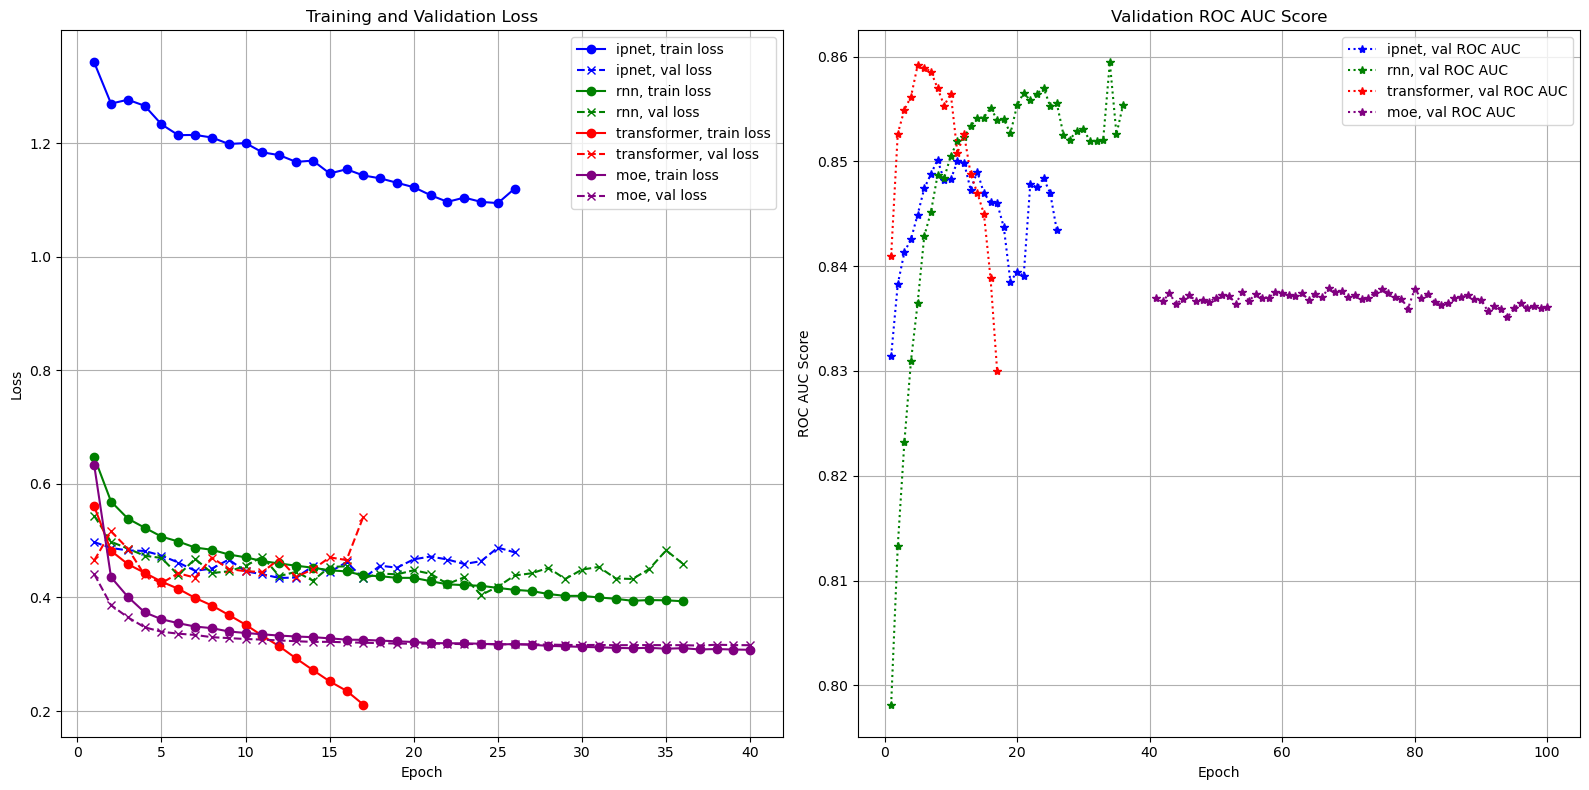

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

colors = {
    'ipnet': 'blue',
    'rnn': 'green',
    'transformer': 'red',
    'moe_attention': 'purple'
}

axs[0].plot(df_ipnet['train_loss'], label='ipnet, train loss', linestyle='-', marker='o', color=colors['ipnet'])
axs[0].plot(df_ipnet['val_loss'], label='ipnet, val loss', linestyle='--', marker='x', color=colors['ipnet'])
axs[0].plot(df_rnn['train_loss'], label='rnn, train loss', linestyle='-', marker='o', color=colors['rnn'])
axs[0].plot(df_rnn['val_loss'], label='rnn, val loss', linestyle='--', marker='x', color=colors['rnn'])
axs[0].plot(df_transformer['train_loss'], label='transformer, train loss', linestyle='-', marker='o', color=colors['transformer'])
axs[0].plot(df_transformer['val_loss'], label='transformer, val loss', linestyle='--', marker='x', color=colors['transformer'])
axs[0].plot(df_moe['train_loss'][:40], label='moe, train loss', linestyle='-', marker='o', color=colors['moe_attention']) # starts overfitting here
axs[0].plot(df_moe['val_loss'][:40], label='moe, val loss', linestyle='--', marker='x', color=colors['moe_attention']) # starts overfitting here
axs[0].set_title('Training and Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(df_ipnet['val_roc_auc_score'], label='ipnet, val ROC AUC', linestyle=':', marker='*', color=colors['ipnet'])
axs[1].plot(df_rnn['val_roc_auc_score'], label='rnn, val ROC AUC', linestyle=':', marker='*', color=colors['rnn'])
axs[1].plot(df_transformer['val_roc_auc_score'], label='transformer, val ROC AUC', linestyle=':', marker='*', color=colors['transformer'])
axs[1].plot(df_moe['auc_score'][:40], label='moe, val ROC AUC', linestyle=':', marker='*', color=colors['moe_attention']) # starts overfitting here
axs[1].set_title('Validation ROC AUC Score')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('ROC AUC Score')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()